In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.patches as mpatches
import requests
import json


import gmaps
import pandas as pd

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

# Do the data stuff for the cities

data_to_load = "Output_data/cleansed_dataframe.csv"
city_data = pd.read_csv(data_to_load)
list_of_city_column_headers = list(city_data.columns.values)
print(list_of_city_column_headers)
print(city_data.shape)



['Case ID ', 'Company', 'Region', 'Status', 'Source', 'Current Agent', 'Creation Date', 'Due Date', 'Closed Date', 'Service Group', 'Service', 'Pended Date', 'Pending Reason', 'Latest Communicated Date', 'User Group', 'Type', 'Service Center', 'Case Age (in days)', 'Days From Latest Communication', 'Systems', 'Requestor', 'Unnamed: 25', 'Creation_Date', 'Creation Time', 'Creation Year', 'Creation Month', 'Creation Day', 'Creation_day_of_week', 'Due_Date', 'Due Time', 'Due Year', 'Due Month', 'Due Day', 'Due_day_of_week', 'Closed_Date', 'Closed Time', 'Pended_Date', 'Pended Time']
(64686, 38)


In [2]:
service_center_ticket_counts = city_data['Service Center'].value_counts()

service_center_ticket_counts_list = service_center_ticket_counts.tolist()
service_centers_list = service_center_ticket_counts.index.tolist()
service_centers_list = [sc.replace('US - AMO', 'Washington DC') for sc in service_centers_list]
print(service_centers_list)
print(type(service_centers_list))
print(service_center_ticket_counts_list)
print(type(service_center_ticket_counts_list))

['Jacksonville', 'Granada', 'Dalian', 'Katowice', 'Buenos Aires', 'Manila', 'St Johns', 'Washington DC']
<class 'list'>
[32455, 19711, 3104, 2927, 1876, 1735, 1688, 1190]
<class 'list'>


In [3]:
# Build the endpoint URL

lats = []
longs = []

for target_city in service_centers_list:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, gkey)

    # Run a request to endpoint and convert result to json
    geo_data = requests.get(target_url).json()

    # Print the json
    #print(geo_data)

    # Extract latitude and longitude
    lat = geo_data["results"][0]["geometry"]["location"]["lat"]
    lng = geo_data["results"][0]["geometry"]["location"]["lng"]
    
    longs.append(lng)
    lats.append(lat)
    # Print the latitude and longitude
    #print('''
    #    City: {0}
     #   Latitude: {1}
       # Longitude: {2}
       # '''.format(target_city, lat, lng))
#print(lats)
#print(longs)

locations_dict = {'Service Center':service_centers_list,'Ticket Count':service_center_ticket_counts_list, "Latitude" : lats, "Longitude" : longs}
locations_df = pd.DataFrame(locations_dict)
locations_df

,Service Center,Ticket Count,Latitude,Longitude
0,Jacksonville,32455,30.332184,-81.655651
1,Granada,19711,37.177336,-3.598557
2,Dalian,3104,38.914003,121.614682
3,Katowice,2927,50.264892,19.023781
4,Buenos Aires,1876,-34.603684,-58.381559
5,Manila,1735,14.599512,120.984219
6,St Johns,1688,37.090240,-95.712891
7,Washington DC,1190,38.907192,-77.036871


Text(0, 0.5, 'Tickets')

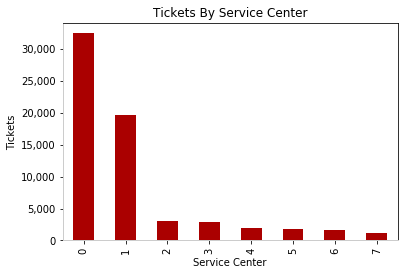

In [4]:
#x_axis = np.arange(0, len(service_centers_list))
#tick_locations = []
#for x in x_axis:
    #tick_locations.append(x)

#plt.title("Tickets By Service Center")
#plt.xlabel("Service Center")
#plt.ylabel("Tickets")

#plt.xlim(0, len(service_centers_list))
#plt.ylim(0, max(service_center_ticket_counts_list) + 2000)

#plt.bar(x_axis, service_center_ticket_counts_list, facecolor="green", alpha=0.75, align="center")
#plt.xticks(tick_locations, service_centers_list)
#plt.tight_layout()
#plt.show()
#locations_df.set_index('Service Center',drop=True,inplace=True)

tickets_sorted = locations_df.sort_values('Ticket Count',ascending=False)
ax = tickets_sorted['Ticket Count'].plot(kind='bar',facecolor='#AA0000')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.patch.set_facecolor('#FFFFFF')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)

plt.title("Tickets By Service Center")
plt.xlabel("Service Center")
plt.ylabel("Tickets")
#plt.savefig('Images/3_Tickets_By_Service_Center.png', bbox_inches='tight')

In [5]:
# Store latitude and longitude in locations
locations = locations_df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
ticket_count = locations_df["Ticket Count"].astype(float)

In [6]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=ticket_count, 
                                 dissipating=False, max_intensity=12500,
                                 point_radius=10)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
# BONUS
# Plost as a Hybrid map
fig = gmaps.figure(map_type="HYBRID")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=ticket_count, 
                                 dissipating=False, max_intensity=12500,
                                 point_radius=12)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))